In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
from riemannian_manifold import RiemannianManifold

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Example 1: $S^2$

In [2]:
%matplotlib qt

r, theta, phi = sp.symbols('r theta phi')
g = sp.diag(r**2, r**2*sp.sin(theta)**2)
coords = [theta, phi]
S2 = RiemannianManifold(coords, g)

geodesic, norm = S2.get_geodesic([np.pi/2, np.pi/2], [np.pi/2+np.pi/8, 2*np.pi], params={r: 1})
x = np.sin(geodesic[:, 0])*np.cos(geodesic[:, 1])
y = np.sin(geodesic[:, 0])*np.sin(geodesic[:, 1])
z = np.cos(geodesic[:, 0])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the geodesic
ax.plot3D(x, y, z, color='r', lw=4)

# Plot the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.5)

# ax.axis('off')
plt.title('Length of the curve: {:.2f}'.format(norm))

Text(0.5, 0.92, 'Length of the curve: 4.76')

## Example 2: Poincaré Half-Plane

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


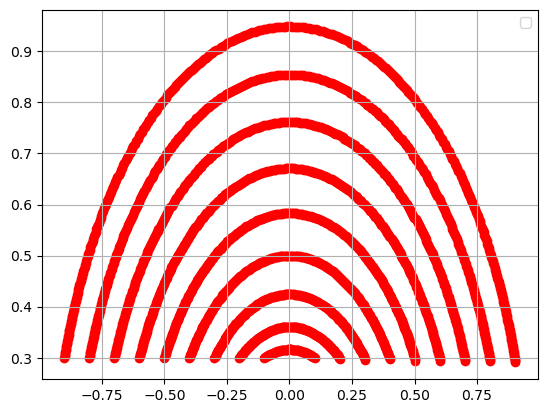

In [3]:
%matplotlib inline

x, y = sp.symbols('x y')
coords = [x, y]
g = sp.diag(1/y**2, 1/y**2)

M = RiemannianManifold(coords, g)
geodesic, _ = M.get_geodesic([-4, 4], [4, 1])
# plt.plot(geodesic[:, 0], geodesic[:, 1], color='r', lw=4)

r = np.arange(0.1, 1, 0.1)
for i in range(len(r)):
    geodesic, norm = M.get_geodesic([-r[i], 0.3], [r[i], 0.3])
    plt.scatter(geodesic[:, 0], geodesic[:, 1], c='r')
plt.legend()
plt.grid()

## Example 3: Schwarzschild Metric

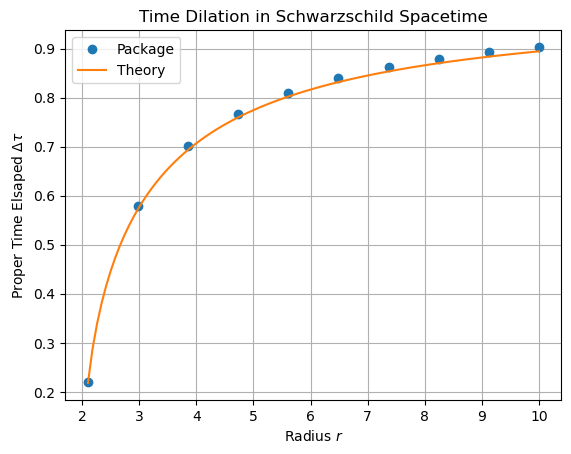

In [4]:
%matplotlib inline
t, r, theta, phi = sp.symbols('t r theta phi')
G, M = sp.symbols('G M')
coords = [t, r, theta, phi]
g = sp.diag(-(1-2*G*M/r), 1/(1-2*G*M/r), r**2, r**2*sp.sin(theta)**2)
Schwarzschild = RiemannianManifold(coords, g)

def dilation(r):
    # Natural units: G = M = 1
    return np.sqrt(1-2/r)

def dilation_package(radius):
    start = [0, radius, np.pi/2, 0]
    end = [1, radius, np.pi/2, 0]
    params = {G: 1, M: 1}
    _, norm = Schwarzschild.get_geodesic(start, end, params=params)
    return norm

r_theory = np.linspace(2.1, 10, 100)
r_package = np.linspace(2.1, 10, 10)
result_package = np.array([dilation_package(r_val) for r_val in r_package])

plt.plot(r_package, result_package, 'o', label='Package')
plt.plot(r_theory, dilation(r_theory), label='Theory')
plt.xlabel(r'Radius $r$')
plt.ylabel(r'Proper Time Elsaped $\Delta\tau$')
plt.title('Time Dilation in Schwarzschild Spacetime')
plt.grid()
plt.legend()

## Example 4: Cylinder

In [4]:
%matplotlib qt
r, phi, z = sp.symbols('r theta phi')
coords = [phi, z]
g = sp.diag(r**2, 1)

Cylinder = RiemannianManifold(coords, g)

start = [0, 0]
end = [sp.pi, 4]

geodesic, norm = Cylinder.get_geodesic(start, end, params={r: 1})

def get_cartesian(r, phi, z):
    x = r*sp.cos(phi)
    y = r*sp.sin(phi)
    z = z
    return x, y, z

# Plot
r = 1
theta = np.arange(0, 2*np.pi, 0.01)
z = np.arange(0, 5, 0.01)
theta, z = np.meshgrid(theta, z)

x = r*np.cos(theta)
y = r*np.sin(theta)
z = z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)

phi, z = geodesic[:, 0], geodesic[:, 1]
x, y, z = r*np.cos(phi), r*np.sin(phi), z

ax.plot(x, y, z, label='geodesic', color='r', linewidth=2)